In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [5]:
df = pd.read_csv(r"C:\Users\dell\Downloads\Uber-Jan-Feb-FOIL.csv")

In [7]:
df

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537
...,...,...,...,...
349,B02764,2/28/2015,3952,39812
350,B02617,2/28/2015,1372,14022
351,B02682,2/28/2015,1386,14472
352,B02512,2/28/2015,230,1803


In [9]:
df.shape

(354, 4)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   dispatching_base_number  354 non-null    object
 1   date                     354 non-null    object
 2   active_vehicles          354 non-null    int64 
 3   trips                    354 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 11.2+ KB


In [13]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   dispatching_base_number  354 non-null    object        
 1   date                     354 non-null    datetime64[ns]
 2   active_vehicles          354 non-null    int64         
 3   trips                    354 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 11.2+ KB


In [17]:
df = df.dropna()
df = df[(df['active_vehicles'] > 0) & (df['trips'] > 0)]

In [19]:
df['month'] = df['date'].dt.month
df['weekday'] = df['date'].dt.weekday  # 0 = Monday

In [21]:
df['trips_per_vehicle'] = df['trips'] / df['active_vehicles']

In [23]:
X = df[['active_vehicles', 'month', 'weekday']]
y = df['trips']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [31]:
dt = DecisionTreeRegressor(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

In [33]:
print("🔹 Linear Regression")
print("MAE:", round(mean_absolute_error(y_test, lr_pred), 2))
print("R2 :", round(r2_score(y_test, lr_pred), 2))

🔹 Linear Regression
MAE: 1112.25
R2 : 0.98


In [35]:
print("\n🔹 Decision Tree")
print("MAE:", round(mean_absolute_error(y_test, dt_pred), 2))
print("R2 :", round(r2_score(y_test, dt_pred), 2))


🔹 Decision Tree
MAE: 1321.53
R2 : 0.97


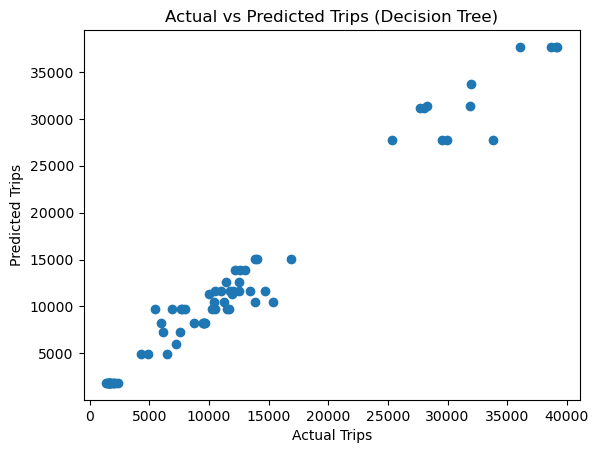

In [37]:
plt.scatter(y_test, dt_pred)
plt.xlabel("Actual Trips")
plt.ylabel("Predicted Trips")
plt.title("Actual vs Predicted Trips (Decision Tree)")
plt.show()

In [39]:
results = X_test.copy()
results['Actual_Trips'] = y_test.values
results['Predicted_Trips'] = dt_pred

In [41]:
results.to_csv("uber_trip_predictions.csv", index=False)

In [51]:
print("✅ File saved: uber_trip_predictions.csv")


✅ File saved: uber_trip_predictions.csv
